In [29]:
import medmnist
import matplotlib.pyplot as plt
from torchvision import transforms
from ophthalmology.data.modules import RetinaMNIST
import torch
import einops

In [2]:
data = medmnist.dataset.RetinaMNIST(split="train",download=True, root="/home/laurenz/Documents/jku/ophthalmology/data")

Using downloaded and verified file: /home/laurenz/Documents/jku/ophthalmology/data/retinamnist.npz


In [3]:
data

Dataset RetinaMNIST (retinamnist)
    Number of datapoints: 1080
    Root location: /home/laurenz/Documents/jku/ophthalmology/data
    Split: train
    Task: ordinal-regression
    Number of channels: 3
    Meaning of labels: {'0': '0', '1': '1', '2': '2', '3': '3', '4': '4'}
    Number of samples: {'train': 1080, 'val': 120, 'test': 400}
    Description: The RetinaMNIST is based on the DeepDRiD challenge, which provides a dataset of 1,600 retina fundus images. The task is ordinal regression for 5-level grading of diabetic retinopathy severity. We split the source training set with a ratio of 9:1 into training and validation set, and use the source validation set as the test set. The source images of 3×1,736×1,824 are center-cropped and resized into 3×28×28.
    License: CC BY 4.0

In [4]:
len(data)

1080

In [16]:
transforms.ToTensor()(data[7][0]).mean((1,2))

tensor([0.3713, 0.1614, 0.1149])

In [8]:
data[0][1]

array([0])

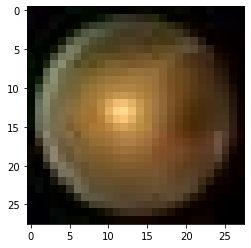

In [5]:
plt.imshow(data[3][0])

/home/laurenz/.cache/pypoetry/virtualenvs/ophthalmology-o2BPsQAn-py3.9/lib/python3.9/site-packages/skimage/_shared/utils.py:338: FutureWarning: `multichannel` is a deprecated argument name for `montage`. It will be removed in version 1.0.Please use `channel_axis` instead.
  return func(*args, **kwargs)


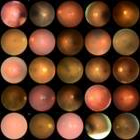

In [6]:
data.montage(length=5)

In [7]:
data_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[.5], std=[.5])
])

data = medmnist.dataset.RetinaMNIST(
    split="train",
    download=True, 
    root="/home/laurenz/Documents/jku/ophthalmology/data",
    transform = data_transform
)

Using downloaded and verified file: /home/laurenz/Documents/jku/ophthalmology/data/retinamnist.npz


In [8]:
data[0][0].std(dim=[1,2])

tensor([0.4247, 0.2977, 0.1750])

In [9]:
data[0][0].mean(dim=[1,2])

tensor([-0.4140, -0.6062, -0.7756])

In [17]:
module = RetinaMNIST(
    data_dir="../../data/",
    train_transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.3211, 0.2243, 0.1602], std=[0.2617, 0.1825, 0.1308])
    ]),
)

Using downloaded and verified file: ../../data/retinamnist.npz
Using downloaded and verified file: ../../data/retinamnist.npz
Using downloaded and verified file: ../../data/retinamnist.npz


In [18]:
dl = module.train_dataloader()

In [37]:
x, y = next(iter(dl))

In [38]:
x.shape

torch.Size([16, 3, 28, 28])

In [39]:
x.mean((0, 2, 3))

tensor([ 0.1763, -0.0239, -0.1784])

In [40]:
x.std((0, 2, 3))

tensor([1.0854, 0.9841, 0.9626])

In [41]:
torch.max(x)

tensor(4.0819)

In [42]:
torch.min(x)

tensor(-1.2290)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


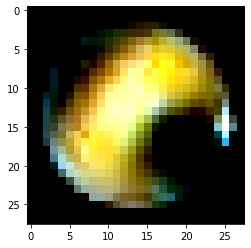

In [43]:
plt.imshow(einops.rearrange(x[0].squeeze().numpy(), "c w h -> w h c"))

In [45]:
x_img = x * torch.tensor([0.2617, 0.1825, 0.1308]).reshape((1,3,1,1)) + torch.tensor([0.3211, 0.2243, 0.1602]).reshape((1,3,1,1))

In [46]:
x_img.mean((0, 2, 3))

tensor([0.3672, 0.2199, 0.1369])

In [47]:
x_img.std((0, 2, 3))

tensor([0.2840, 0.1796, 0.1259])

In [48]:
torch.max(x_img)

tensor(1.)

In [49]:
torch.min(x_img)

tensor(-1.4901e-08)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


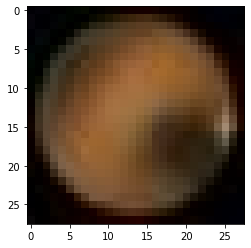

In [50]:
plt.imshow(einops.rearrange(x_img[0].squeeze().numpy(), "c w h -> w h c"))